# pycisTopic analysis

Full dataset, using consensus peak regions.

In [1]:
import pycisTopic
pycisTopic.__version__

'0.1.dev295+gbd4bf4d.d20210830'

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pickle
import pandas as pd

In [4]:
import os
wdir = '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/'
os.chdir( wdir )

---

In [5]:
fragments_dict = {
'Broad_1':      '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_1.sinto.mm.fragments.tsv.gz',
'Broad_2':      '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_2.sinto.mm.fragments.tsv.gz',
'Broad_mito_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_mito_1.sinto.mm.fragments.tsv.gz',
'Broad_mito_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_mito_2.sinto.mm.fragments.tsv.gz',
'CNAG_1':       '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/CNAG_1.sinto.mm.fragments.tsv.gz',
'CNAG_2':       '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/CNAG_2.sinto.mm.fragments.tsv.gz',
's3atac':       '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/s3atac.sinto.mm.fragments.tsv.gz',
'Sanger_1':     '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Sanger_1.sinto.mm.fragments.tsv.gz',
'Sanger_2':     '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Sanger_2.sinto.mm.fragments.tsv.gz',
'Stanford_1':   '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Stanford_1.sinto.mm.fragments.tsv.gz',
'Stanford_2':   '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Stanford_2.sinto.mm.fragments.tsv.gz',
'VIB_1':        '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/VIB_1.sinto.mm.fragments.tsv.gz',
'VIB_2':        '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/VIB_2.sinto.mm.fragments.tsv.gz',
}

In [6]:
consensus_peaks_dict = {
'Broad_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Broad_1/Broad_1__consensus_regions.bed',
'Broad_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Broad_2/Broad_2__consensus_regions.bed',
'Broad_mito_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Broad_mito_1/Broad_mito_1__consensus_regions.bed',
'Broad_mito_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Broad_mito_2/Broad_mito_2__consensus_regions.bed',
'CNAG_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/CNAG_1/CNAG_1__consensus_regions.bed',
'CNAG_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/CNAG_2/CNAG_2__consensus_regions.bed',
'merged': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/merged/merged__consensus_regions.bed',
's3atac': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/s3atac/s3atac__consensus_regions.bed',
'Sanger_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Sanger_1/Sanger_1__consensus_regions.bed',
'Sanger_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Sanger_2/Sanger_2__consensus_regions.bed',
'Stanford_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Stanford_1/Stanford_1__consensus_regions.bed',
'Stanford_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/Stanford_2/Stanford_2__consensus_regions.bed',
'VIB_1': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/VIB_1/VIB_1__consensus_regions.bed',
'VIB_2': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/VIB_2/VIB_2__consensus_regions.bed',
'merged': '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/consensus_peak_calling/merged/merged__consensus_regions.bed'
}

## Library QC metrics

In [7]:
from pycisTopic.qc import compute_qc_stats

In [8]:
f_biomart = '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/biomart_annot.pickle'
with open(f_biomart, 'rb') as f:
    annot = pickle.load(f)
annot

,Chromosome,Start,Strand,Gene,Transcript_type
8986,chrY,9337464,1,TSPY4,protein_coding
8987,chrY,9337510,1,TSPY4,protein_coding
9024,chrY,22490397,1,PRY,protein_coding
9100,chrY,14056227,1,VCY1B,protein_coding
9136,chrY,12662368,1,USP9Y,protein_coding
...,...,...,...,...,...
236024,chr1,36479519,-1,CSF3R,protein_coding
236025,chr1,36471474,-1,CSF3R,protein_coding
236033,chr1,36482051,-1,CSF3R,protein_coding
236034,chr1,36323645,-1,EVA1B,protein_coding


In [ ]:
metadata_bc_dict, profile_data_dict = compute_qc_stats(
        fragments_dict=fragments_dict,
        tss_annotation=annot,
        stats=['barcode_rank_plot', 'duplicate_rate', 'insert_size_distribution', 'profile_tss', 'frip'],
        label_list=None,
        path_to_regions=consensus_peaks_dict,
        n_cpu=7,
        valid_bc=None,
        n_frag=100,
        n_bc=None,
        tss_flank_window=2000,
        tss_window=50,
        tss_minimum_signal_window=100,
        tss_rolling_window=10,
        min_norm=0.1,
        remove_duplicates = True,
        )

2021-09-14 16:55:05,887	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


(pid=6803) 2021-09-14 16:55:08,909 cisTopic     INFO     Reading s3atac
(pid=6808) 2021-09-14 16:55:08,850 cisTopic     INFO     Reading CNAG_2
(pid=6804) 2021-09-14 16:55:08,898 cisTopic     INFO     Reading Broad_2
(pid=6805) 2021-09-14 16:55:08,893 cisTopic     INFO     Reading Broad_mito_2
(pid=6809) 2021-09-14 16:55:08,924 cisTopic     INFO     Reading Broad_mito_1
(pid=6806) 2021-09-14 16:55:08,923 cisTopic     INFO     Reading CNAG_1
(pid=6801) 2021-09-14 16:55:08,923 cisTopic     INFO     Reading Broad_1
(pid=6809) 2021-09-14 16:56:05,694 cisTopic     INFO     Computing barcode rank plot for Broad_mito_1
(pid=6809) 2021-09-14 16:56:05,695 cisTopic     INFO     Counting fragments
(pid=6805) 2021-09-14 16:56:08,201 cisTopic     INFO     Computing barcode rank plot for Broad_mito_2
(pid=6805) 2021-09-14 16:56:08,202 cisTopic     INFO     Counting fragments
(pid=6809) 2021-09-14 16:56:10,810 cisTopic     INFO     Marking barcodes with more than 100
(pid=6809) 2021-09-14 16:56:10,83

In [ ]:
f_qc_dir = 'qc__consensus_peaks'
if not os.path.exists(os.path.join(wdir, f_qc_dir)):
    os.makedirs(os.path.join(wdir, f_qc_dir))
    
with open(os.path.join(wdir, f_qc_dir, 'metadata.pickle'), 'wb') as f:
    pickle.dump(metadata_bc_dict, f)

with open(os.path.join(wdir, f_qc_dir, 'profile_data.pickle'), 'wb') as f:
    pickle.dump(profile_data_dict, f)

## Create the cisTopic objects for each sample

In [7]:
from pycisTopic.cistopic_class import create_cistopic_object_from_fragments

In [8]:
#path_to_regions = '/staging/leuven/stg_00002/lcb/cbravo/SCREEN_ENCODE3/V2.hg38-rDHS-Unfiltered.blacklisted.bed'
path_to_blacklist = '/staging/leuven/stg_00002/lcb/cflerin/testruns/pycisTopic/pycisTopic/blacklist/hg38-blacklist.v2.bed'

In [9]:
# Valid barcodes
with open(wdir + 'barcodes_passing_filters2.pkl', 'rb') as f:
    bc_passing_filters = pickle.load(f)

In [10]:
f_cto_dir = 'cistopic_objs__consensus_peaks'
if not os.path.exists(os.path.join(wdir, f_cto_dir)):
    os.makedirs(os.path.join(wdir, f_cto_dir))

In [11]:
#Create all objects

for key in bc_passing_filters.keys():
    f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj.pkl')
    if os.path.isfile(f_out):
        print(f"Skipping {key}")
        continue
        
    tmp_cto = create_cistopic_object_from_fragments(path_to_fragments=fragments_dict[key],
                                                    path_to_regions=consensus_peaks_dict[key],
                                                    path_to_blacklist=path_to_blacklist,
                                                    #metrics=metadata_bc_dict[key],
                                                    valid_bc=bc_passing_filters[key],
                                                    n_cpu=1,
                                                    partition=20,
                                                    project=key)
    
    with open(f_out, 'wb') as f:
        pickle.dump(tmp_cto, f)
    
    print(f"DONE {key}")


Skipping Broad_1
Skipping Broad_2
Skipping Broad_mito_1
Skipping Broad_mito_2
Skipping CNAG_1
Skipping CNAG_2
Skipping s3atac
Skipping Sanger_1
Skipping Sanger_2
Skipping Stanford_1
Skipping Stanford_2
Skipping VIB_1
Skipping VIB_2


In [12]:
# load objects into dict:
cistopic_obj_dict = {}
for key in bc_passing_filters.keys():
    f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj.pkl')
    with open(f_out, 'rb') as f:
        tmp_cto = pickle.load(f)
    cistopic_obj_dict[key] = tmp_cto
    print(f"Loaded {key}")

Loaded Broad_1
Loaded Broad_2
Loaded Broad_mito_1
Loaded Broad_mito_2
Loaded CNAG_1
Loaded CNAG_2
Loaded s3atac
Loaded Sanger_1
Loaded Sanger_2
Loaded Stanford_1
Loaded Stanford_2
Loaded VIB_1
Loaded VIB_2


## Export region-accessibility looms

For use in cell type identification

In [11]:
import loompy as lp

In [12]:
f_crl_dir = 'cell_region_loom__consensus'
if not os.path.exists(os.path.join(wdir, f_crl_dir)):
    os.makedirs(os.path.join(wdir, f_crl_dir))

In [13]:
for key in cistopic_obj_dict.keys():
    f_out = os.path.join(wdir, f_crl_dir, key + 'cell_region-all.loom')
    if os.path.isfile(f_out):
        print(f"Skipping {key}")
    else:
        lp.create(
            filename = f_out,
            layers=cistopic_obj_dict[key].fragment_matrix,
            row_attrs={ 'Gene': cistopic_obj_dict[key].region_names }, 
            #col_attrs={ 'CellID': cistopic_obj_dict[key].cell_names }, 
            col_attrs={ 'CellID': [ x.split('-')[0] for x in cistopic_obj_dict[key].cell_names ] },
            #file_attrs=attrs
        )
        print(f"Finished {key}")

Finished Broad_1
Finished Broad_2
Finished Broad_mito_1
Finished Broad_mito_2
Finished CNAG_1
Finished CNAG_2
Finished s3atac
Finished Sanger_1
Finished Sanger_2
Finished Stanford_1
Finished Stanford_2
Finished VIB_1
Finished VIB_2


## Create a merged object

Here, use a common set of peaks for each sample, then merge them

In [13]:
f_cto_merged_dir = 'cistopic_objs__consensus_peaks_merged'
if not os.path.exists(os.path.join(wdir, f_cto_merged_dir)):
    os.makedirs(os.path.join(wdir, f_cto_merged_dir))

In [14]:
#Create all objects

for key in bc_passing_filters.keys():
    f_out = os.path.join(wdir, f_cto_merged_dir, key + '__cistopic_obj.pkl')
    if os.path.isfile(f_out):
        print(f"Skipping {key}")
        continue
        
    tmp_cto = create_cistopic_object_from_fragments(path_to_fragments=fragments_dict[key],
                                                    path_to_regions=consensus_peaks_dict['merged'],
                                                    path_to_blacklist=path_to_blacklist,
                                                    #metrics=metadata_bc_dict[key],
                                                    valid_bc=bc_passing_filters[key],
                                                    n_cpu=1,
                                                    partition=20,
                                                    project=key)
    
    with open(f_out, 'wb') as f:
        pickle.dump(tmp_cto, f)
    
    print(f"DONE {key}")


Skipping Broad_1
Skipping Broad_2
Skipping Broad_mito_1
Skipping Broad_mito_2
Skipping CNAG_1
Skipping CNAG_2
Skipping s3atac
Skipping Sanger_1
Skipping Sanger_2
Skipping Stanford_1
Skipping Stanford_2
Skipping VIB_1
Skipping VIB_2


In [15]:
# load objects into dict:
cistopic_obj_dict = {}
for key in bc_passing_filters.keys():
    f_out = os.path.join(wdir, f_cto_merged_dir, key + '__cistopic_obj.pkl')
    with open(f_out, 'rb') as f:
        cistopic_obj_dict[key] = pickle.load(f)
    print(f"Loaded {key}")

Loaded Broad_1
Loaded Broad_2
Loaded Broad_mito_1
Loaded Broad_mito_2
Loaded CNAG_1
Loaded CNAG_2
Loaded s3atac
Loaded Sanger_1
Loaded Sanger_2
Loaded Stanford_1
Loaded Stanford_2
Loaded VIB_1
Loaded VIB_2


In [16]:
import copy

In [17]:
f_out = os.path.join(wdir, f_cto_merged_dir, 'fulldata_merged__cistopic_obj.pkl')
if os.path.isfile(f_out):
    print(f"Loading {f_out}")
    with open(f_out, 'rb') as f:
        cistopic_obj_dict['merged'] = pickle.load(f)
else:
    # merge:
    ct_keys = list(cistopic_obj_dict.keys())
    cto_merged = copy.copy(cistopic_obj_dict[ct_keys[0]])
    cto_merged.merge([ cistopic_obj_dict[k] for k in ct_keys[1:] ], project='scATAC-seq_benchmark')
    with open(f_out, 'wb') as f:
        pickle.dump(cto_merged, f)

2021-09-15 12:11:06,071 cisTopic     INFO     cisTopic object 1 merged
2021-09-15 12:11:21,283 cisTopic     INFO     cisTopic object 2 merged
2021-09-15 12:11:39,918 cisTopic     INFO     cisTopic object 3 merged
2021-09-15 12:11:59,199 cisTopic     INFO     cisTopic object 4 merged
2021-09-15 12:12:21,786 cisTopic     INFO     cisTopic object 5 merged
2021-09-15 12:12:42,175 cisTopic     INFO     cisTopic object 6 merged
2021-09-15 12:13:19,059 cisTopic     INFO     cisTopic object 7 merged
2021-09-15 12:14:01,469 cisTopic     INFO     cisTopic object 8 merged
2021-09-15 12:14:44,191 cisTopic     INFO     cisTopic object 9 merged
2021-09-15 12:15:26,685 cisTopic     INFO     cisTopic object 10 merged
2021-09-15 12:16:16,549 cisTopic     INFO     cisTopic object 11 merged
2021-09-15 12:17:08,370 cisTopic     INFO     cisTopic object 12 merged


## Create a set of cisTopic objects for downstream analysis

Include each sample individually (using the sample-specific consensus peaks), plus the merged sample (using the merged consensus peaks).

In [18]:
del cistopic_obj_dict

cistopic_obj_dict = {}
# load sample objects into dict:
for key in bc_passing_filters.keys():
    f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj.pkl')
    with open(f_out, 'rb') as f:
        cistopic_obj_dict[key] = pickle.load(f)
    print(f"Loaded {key}")

# add the merged object:
f_out = os.path.join(wdir, f_cto_merged_dir, 'fulldata_merged__cistopic_obj.pkl')
if os.path.isfile(f_out):
    print(f"Loading {f_out}")
    with open(f_out, 'rb') as f:
        cistopic_obj_dict['merged'] = pickle.load(f)

Loaded Broad_1
Loaded Broad_2
Loaded Broad_mito_1
Loaded Broad_mito_2
Loaded CNAG_1
Loaded CNAG_2
Loaded s3atac
Loaded Sanger_1
Loaded Sanger_2
Loaded Stanford_1
Loaded Stanford_2
Loaded VIB_1
Loaded VIB_2
Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/cistopic_objs__consensus_peaks_merged/fulldata_merged__cistopic_obj.pkl


## Add cell annotations

In [19]:
cellannot = pd.read_csv(
    '/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/fulldata_filtered_cell_data.tsv',
    sep='\t', index_col=0)
cellannot

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,...,barcode,fmx_droplet_type,fmx_sample,Doublet_scores_fragments,Predicted_doublets_fragments,seurat_cell_type,seurat_cell_type_pred_score,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_0.8,consensus_cell_type
TAGTGTTGTGGCGCGAGCGTG_GGCAGGCTGGCAACCTTCATC-Broad_1,11533,4.061942,10427,4.018159,Broad_1,4.449586,4.015527,28157,10364,17793,...,TAGTGTTGTGGCGCGAGCGTG_GGCAGGCTGGCAACCTTCATC,SNG,sampleA,0.235127,False,CD4+ T cell,0.610633,1,0,CD4+ T cell
CTTGCGAGTGGTAGTCTTGTA_GGTCGTAGCACAGCCATCTTA_TTATCATTCAGCAATACCGAA-Broad_1,12804,4.107346,11432,4.058122,Broad_1,4.633650,4.097743,43018,12524,30494,...,CTTGCGAGTGGTAGTCTTGTA_GGTCGTAGCACAGCCATCTTA_TT...,SNG,sampleB,0.074550,False,CD14+ monocyte,0.983182,11,8,CD14+ monocyte
AATTCCAACCGGCTCTAACTC_GGCGTCCTAAGAGGACCATGC_GCTAATTTGGAAGGCTGCGCC-Broad_1,3848,3.585235,3614,3.557988,Broad_1,3.983807,3.602277,9634,4002,5632,...,AATTCCAACCGGCTCTAACTC_GGCGTCCTAAGAGGACCATGC_GC...,SNG,sampleA,0.056856,False,CD4+ T cell,0.878514,1,0,CD4+ T cell
GCGCACGCGCAATCTAAGAGG_GCAGTGTCGGATCTGGTTAGT_CAGAATTCACTTCTCGGATCT-Broad_1,9395,3.972897,8372,3.922829,Broad_1,4.466779,3.903144,29294,8001,21293,...,GCGCACGCGCAATCTAAGAGG_GCAGTGTCGGATCTGGTTAGT_CA...,SNG,sampleA,0.139579,False,Cytotoxic T cell,0.549764,3,14,Cytotoxic T cell
CCGGTTTACCTACCCGGTACG_CTCATTTTTATCATAGCAACG_AACGTAATGGCAACCACATGA-Broad_1,9201,3.963835,8419,3.925261,Broad_1,4.425828,3.954243,26658,9000,17658,...,CCGGTTTACCTACCCGGTACG_CTCATTTTTATCATAGCAACG_AA...,SNG,sampleA,0.054705,False,CD16+ monocyte,0.558353,11,8,CD14+ monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTACGATCTAGCAAC-VIB_2,2906,3.463296,2788,3.445293,VIB_2,3.757624,3.650113,5723,4468,1255,...,TGTACGATCTAGCAAC,SNG,sampleA,0.095982,False,CD14+ monocyte,0.681409,0,1,CD14+ monocyte
TGCATTTAGGAAGGTA-VIB_2,3641,3.561221,3525,3.547159,VIB_2,3.832637,3.720573,6802,5255,1547,...,TGCATTTAGGAAGGTA,SNG,sampleA,0.042274,False,CD14+ monocyte,0.656442,0,1,CD16+ monocyte
AATACGCGTATCTCAG-VIB_2,3633,3.560265,3514,3.545802,VIB_2,3.913231,3.814447,8189,6523,1666,...,AATACGCGTATCTCAG,SNG,sampleB,0.077833,False,CD14+ monocyte,0.684051,23,1,CD14+ monocyte
TTGGTCCCAACACGGA-VIB_2,2340,3.369216,2291,3.360025,VIB_2,3.649530,3.568905,4462,3706,756,...,TTGGTCCCAACACGGA,SNG,sampleB,0.051875,False,CD14+ monocyte,0.665843,0,1,CD14+ monocyte


In [20]:
for key in cistopic_obj_dict.keys():
    cistopic_obj_dict[key].add_cell_data(
        cellannot[['consensus_cell_type']]
    )

### Run models for visualization/clustering

In [21]:
from pycisTopic.lda_models import run_cgs_models_mallet

#### mallet models

In [22]:
# set the memory limit for mallet (1GB default is not enough)
os.environ['MALLET_MEMORY'] = '100G'

In [23]:
f_mod_dir = 'models__consensus__mallet'
if not os.path.exists(os.path.join(wdir, f_mod_dir)):
    os.makedirs(os.path.join(wdir, f_mod_dir))

n_topics = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_topics_merged = [2, 5, 10, 20, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
n_iter = 500

In [ ]:
# mallet implementation
models_dict = {}
for key in cistopic_obj_dict.keys():
    f_mod = os.path.join(wdir, f_mod_dir, key + '__models_' + str(n_iter) + '_iter.pkl')
    if os.path.isfile(f_mod):
        print(f"Loading {f_mod}")
        with open(f_mod, 'rb') as f:
            models_dict[key] = pickle.load(f)
    else:
        print(f"Running {key}")
        model = run_cgs_models_mallet(
                            'mallet',
                            cistopic_obj_dict[key],
                            n_topics=n_topics_merged if key=='merged' else n_topics ,
                            n_cpu=16,
                            n_iter=n_iter,
                            random_state=555,
                            alpha=50,
                            alpha_by_topic=True,
                            eta=0.1,
                            eta_by_topic=False,
                            tmp_path=os.path.join('/tmp', key + '_mallet')
                            )
        # Save
        with open(f_mod, 'wb') as f:
            pickle.dump(model, f)
        print(f"Finished {key}")
        models_dict[key] = model

Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/models__consensus__mallet/Broad_1__models_500_iter.pkl
Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/models__consensus__mallet/Broad_2__models_500_iter.pkl
Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/models__consensus__mallet/Broad_mito_1__models_500_iter.pkl
Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/models__consensus__mallet/Broad_mito_2__models_500_iter.pkl
Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_qc_multiplet_merged/jupyter/models__consensus__mallet/CNAG_1__models_500_iter.pkl
Loading /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/d

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


2021-09-15 12:51:05,026 LDAMalletWrapper INFO     Training MALLET LDA with mallet train-topics --input /tmp/merged_malletcorpus.mallet --num-topics 2  --alpha 50 --beta 0.1 --optimize-interval 0 --num-threads 16 --output-state /tmp/merged_mallet49901c_state.mallet.gz --output-doc-topics /tmp/merged_mallet49901c_doctopics.txt --output-topic-keys /tmp/merged_mallet49901c_topickeys.txt --num-iterations 500 --inferencer-filename /tmp/merged_mallet49901c_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 555
2021-09-15 15:19:19,685 LDAMalletWrapper INFO     loading assigned topics from /tmp/merged_mallet49901c_state.mallet.gz
2021-09-15 15:38:23,817 cisTopic     INFO     Model with 2 topics done!
2021-09-15 15:38:24,044 cisTopic     INFO     Running model with 5 topics
2021-09-15 15:38:24,073 LDAMalletWrapper INFO     MALLET corpus already exists, training model
2021-09-15 15:38:24,073 LDAMalletWrapper INFO     Training MALLET LDA with mallet train-topics --input /tmp/merged_mallet

### Read in LDA/mallett models

In [25]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [26]:
f_mod_dir = 'models__consensus__mallet'

models_dict = {}
for key in cistopic_obj_dict.keys():
    f_mod = os.path.join(wdir, f_mod_dir, key + '__models_' + str(n_iter) + '_iter.pkl')
    if(os.path.isfile(f_mod)):
        with open(f_mod, 'rb') as f:
            models_dict[key] = pickle.load(f)
        print(f"Loaded {key}")

Loaded Broad_1
Loaded Broad_2
Loaded Broad_mito_1
Loaded Broad_mito_2
Loaded CNAG_1
Loaded CNAG_2
Loaded s3atac
Loaded Sanger_1
Loaded Sanger_2
Loaded Stanford_1
Loaded Stanford_2
Loaded VIB_1
Loaded VIB_2
Loaded merged


In [74]:
model_selection = {
    'Broad_1': 40,#30,
    'Broad_2': 40,#35,
    'Broad_mito_1': 30,#25,
    'Broad_mito_2': 30,#30,
    'CNAG_1': 45,#30,
    'CNAG_2': 40,#35,
    's3atac': 45,
    'Sanger_1': 40,
    'Sanger_2': 45,
    'Stanford_1': 50,
    'Stanford_2': 50,
    'VIB_1': 45,#35,
    'VIB_2': 50,#45,
    'merged': 90
}

Broad_1


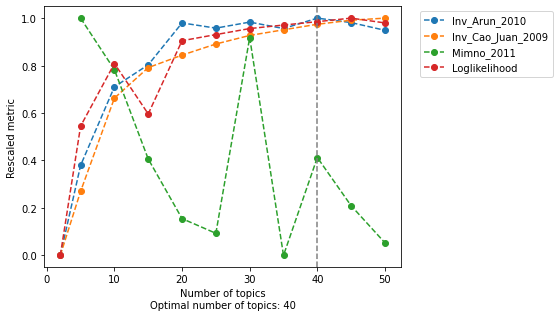

Broad_2


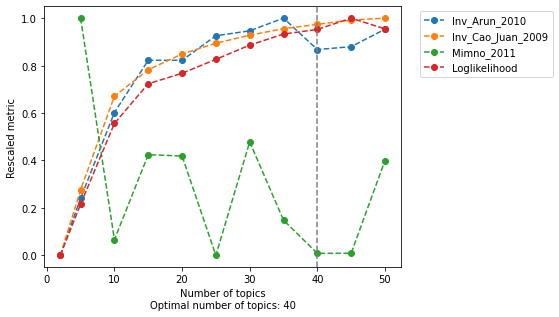

Broad_mito_1


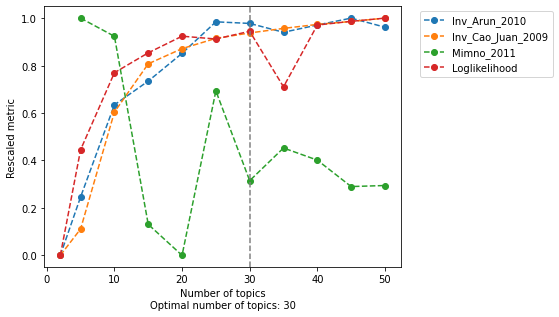

Broad_mito_2


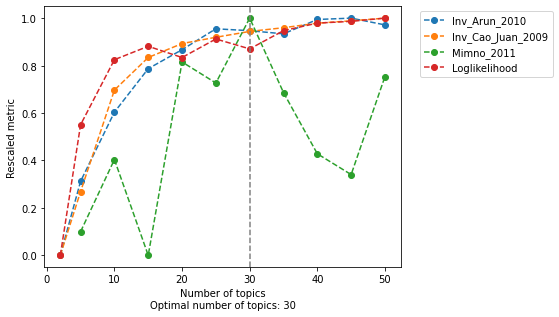

CNAG_1


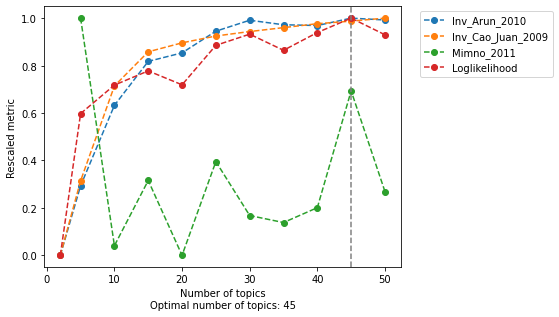

CNAG_2


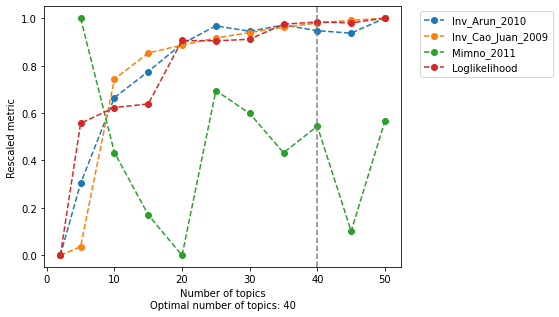

s3atac


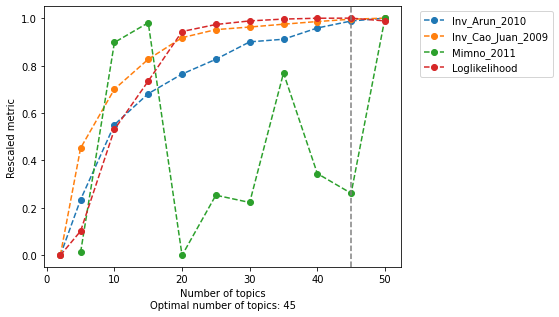

Sanger_1


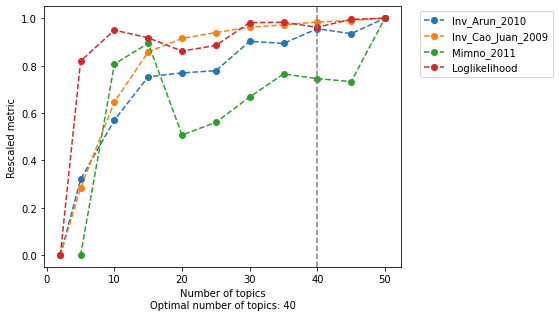

Sanger_2


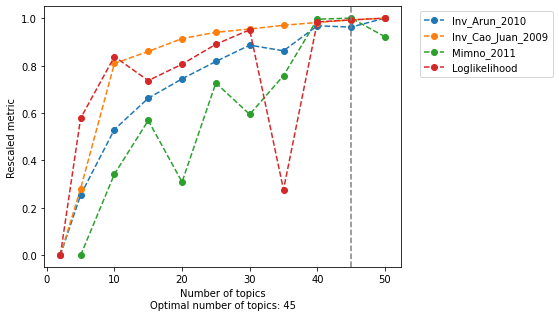

Stanford_1


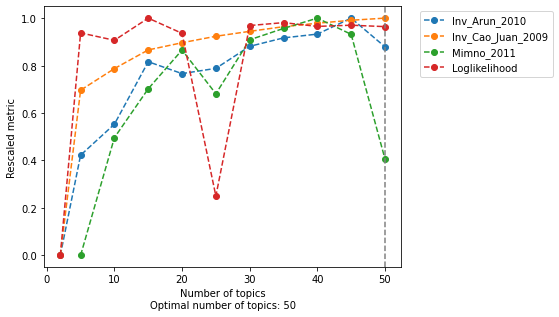

Stanford_2


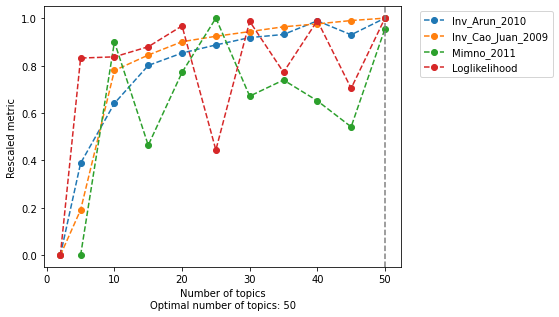

VIB_1


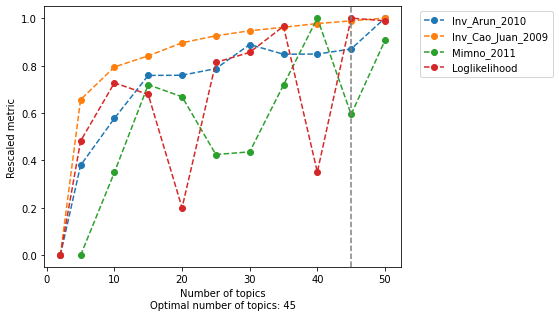

VIB_2


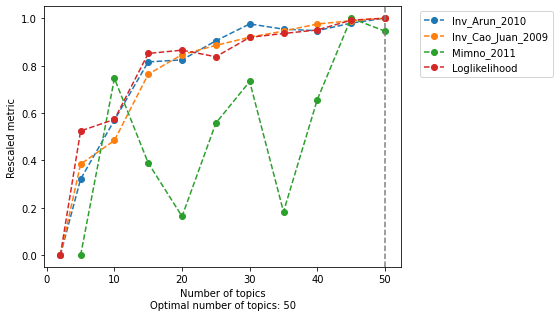

merged


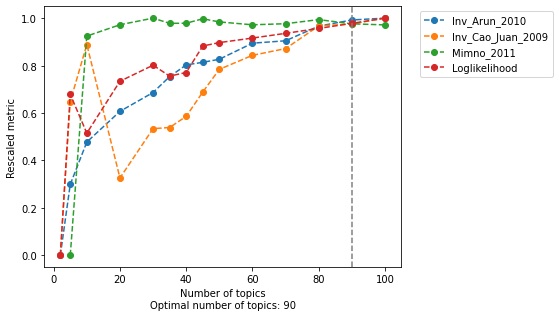

In [75]:
for key in models_dict.keys():
    print(key)
    model=evaluate_models(models_dict[key],
                         select_model=model_selection[key], 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot=True,
                         plot_metrics=False
                         )
    cistopic_obj_dict[key].add_LDA_model(model)

## Visualizations

In [76]:
from pycisTopic.clust_vis import find_clusters, run_umap, run_tsne, plot_metadata, plot_topic, cell_topic_heatmap

In [77]:
for key in cistopic_obj_dict.keys():
    find_clusters(cistopic_obj_dict[key],
              target  = 'cell',
              k = 10,
              res = [0.6, 0.8, 1.0],
              prefix = 'pycisTopic_')
    cistopic_obj_dict[key].projections['cell'] = {}
    run_umap(cistopic_obj_dict[key], target = 'cell')
    #run_tsne(cistopic_obj_dict[key], target = 'cell')

2021-09-14 15:39:57,529 cisTopic     INFO     Finding neighbours
Columns ['pycisTopic_leiden_10_0.6'] will be overwritten
Columns ['pycisTopic_leiden_10_0.8'] will be overwritten
Columns ['pycisTopic_leiden_10_1.0'] will be overwritten
2021-09-14 15:39:58,283 cisTopic     INFO     Running UMAP
2021-09-14 15:40:15,465 cisTopic     INFO     Finding neighbours
Columns ['pycisTopic_leiden_10_0.6'] will be overwritten
Columns ['pycisTopic_leiden_10_0.8'] will be overwritten
Columns ['pycisTopic_leiden_10_1.0'] will be overwritten
2021-09-14 15:40:16,223 cisTopic     INFO     Running UMAP
2021-09-14 15:40:33,424 cisTopic     INFO     Finding neighbours
Columns ['pycisTopic_leiden_10_0.6'] will be overwritten
Columns ['pycisTopic_leiden_10_0.8'] will be overwritten
Columns ['pycisTopic_leiden_10_1.0'] will be overwritten
2021-09-14 15:40:34,085 cisTopic     INFO     Running UMAP
2021-09-14 15:40:48,947 cisTopic     INFO     Finding neighbours
Columns ['pycisTopic_leiden_10_0.6'] will be overw

Broad_1


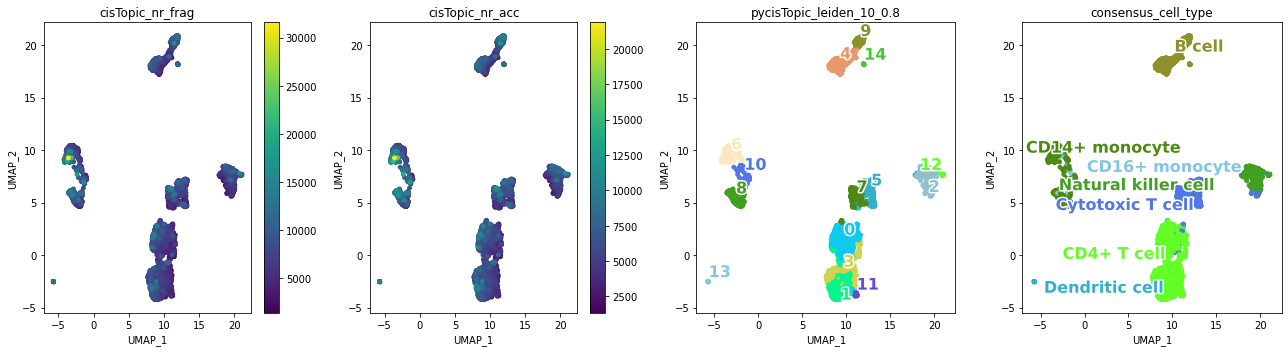

Broad_2


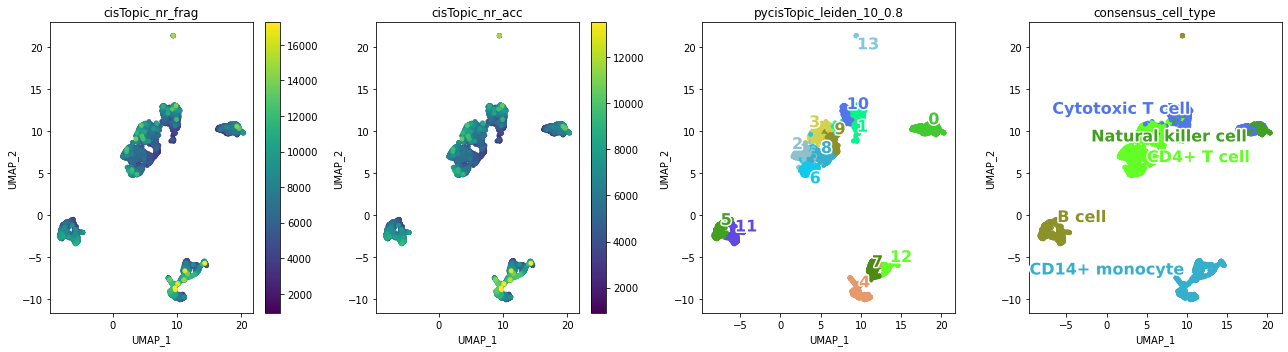

Broad_mito_1


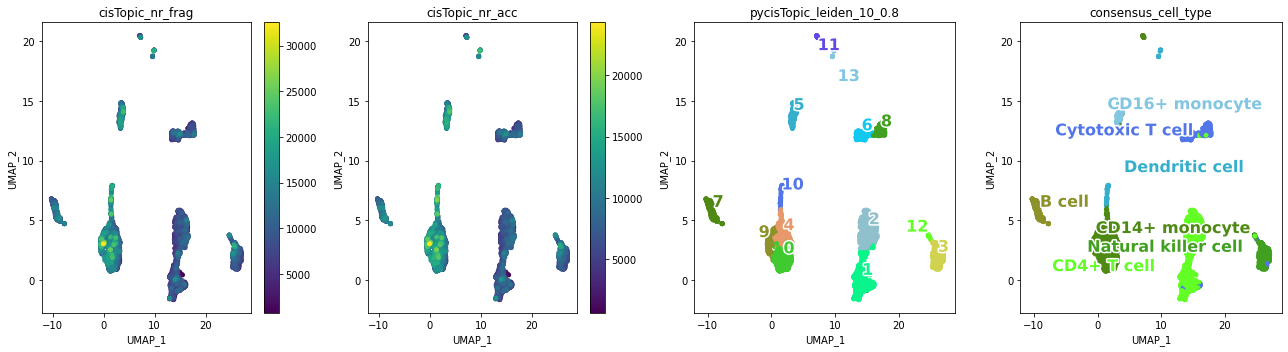

Broad_mito_2


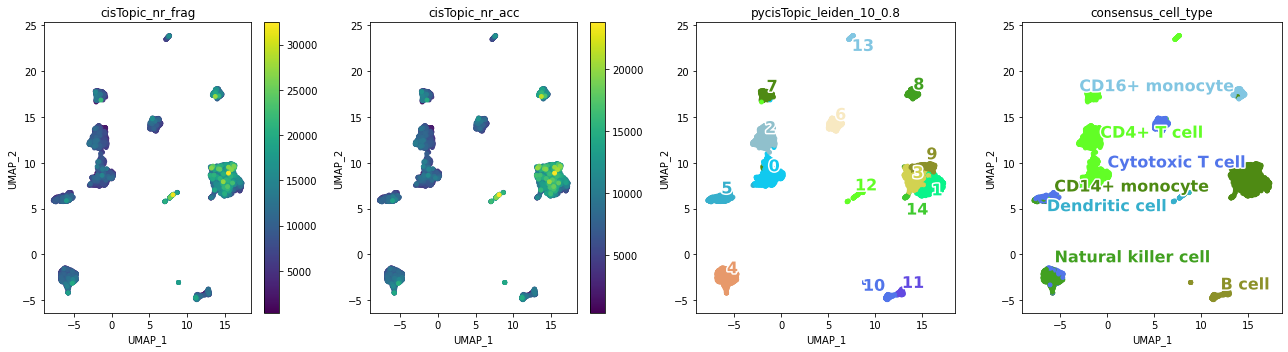

CNAG_1


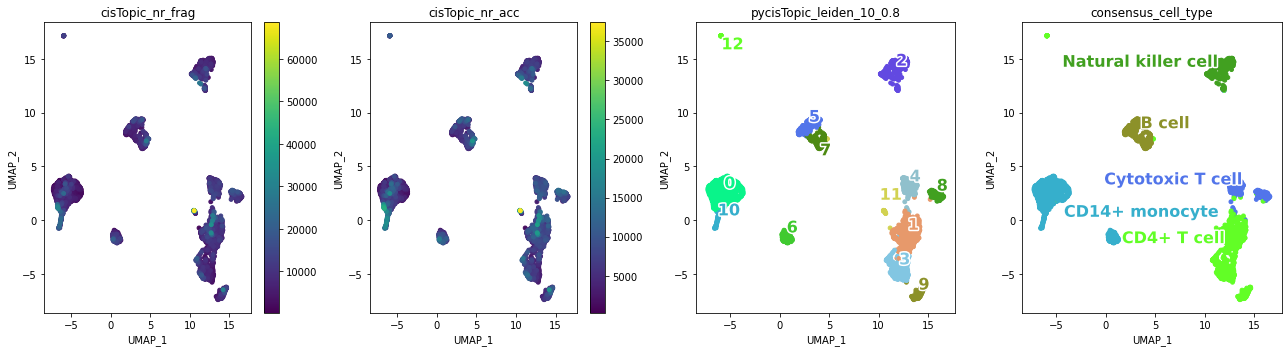

CNAG_2


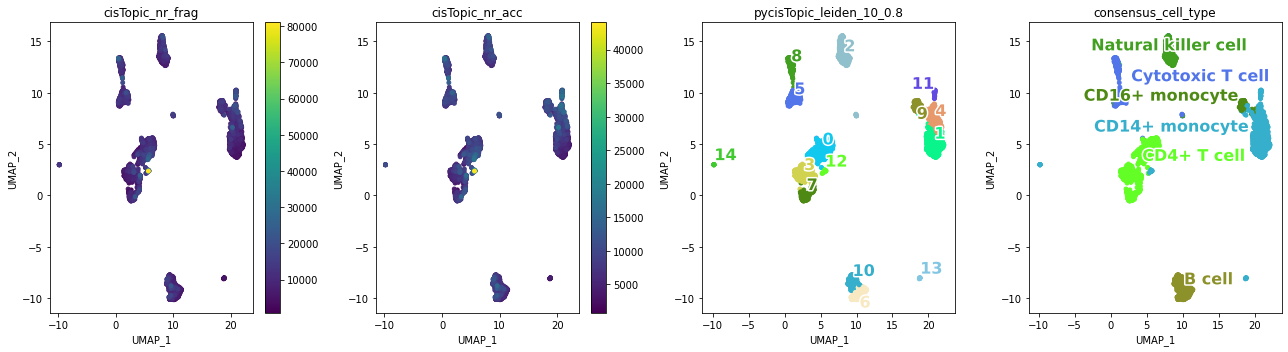

s3atac


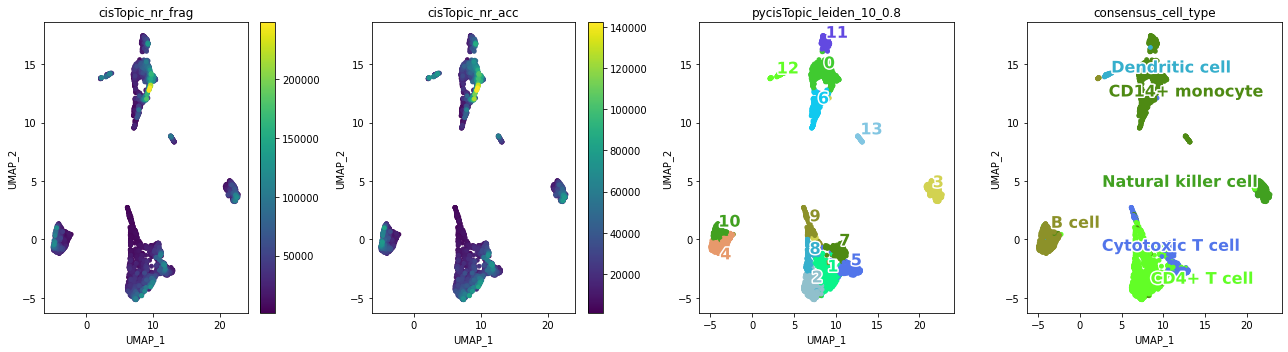

Sanger_1


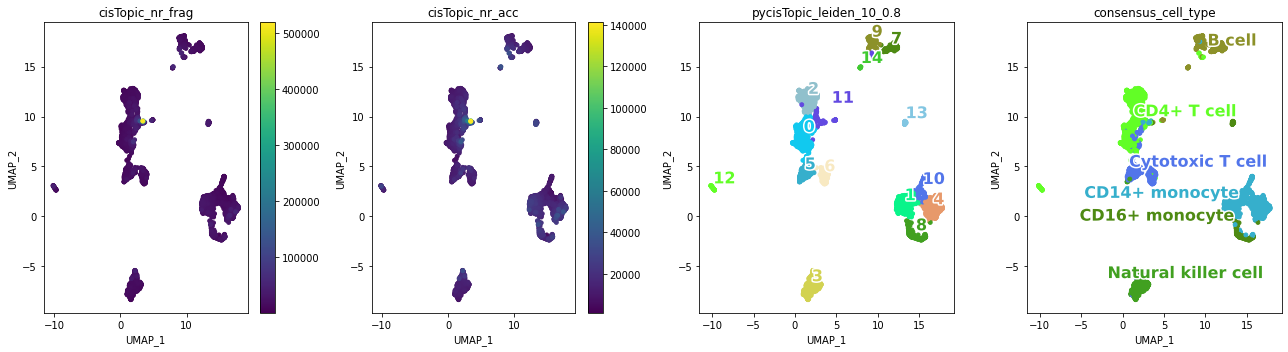

Sanger_2


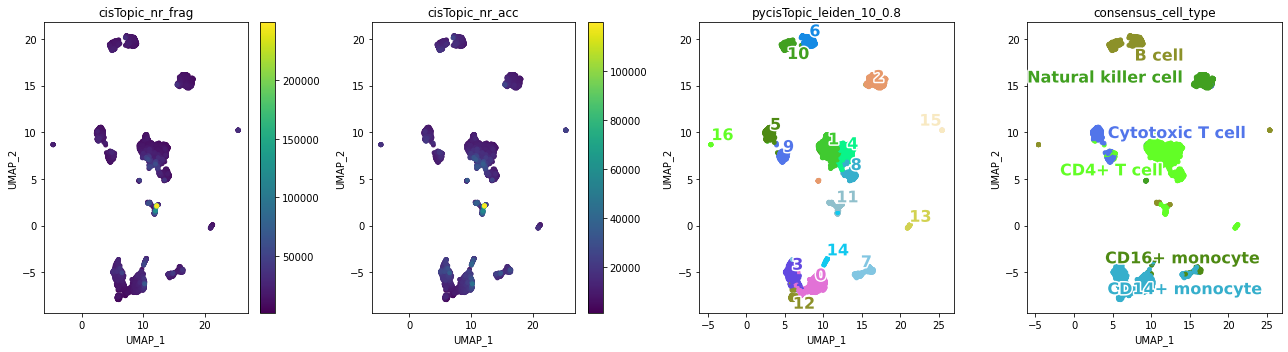

Stanford_1


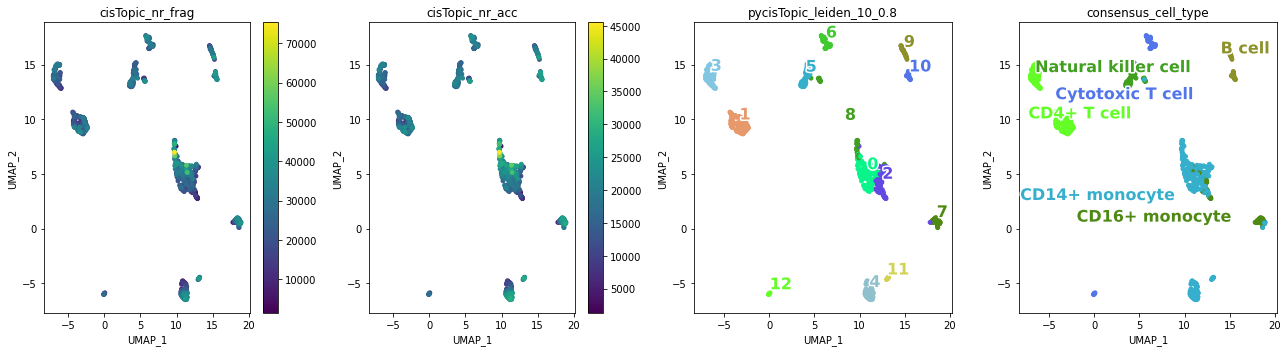

Stanford_2


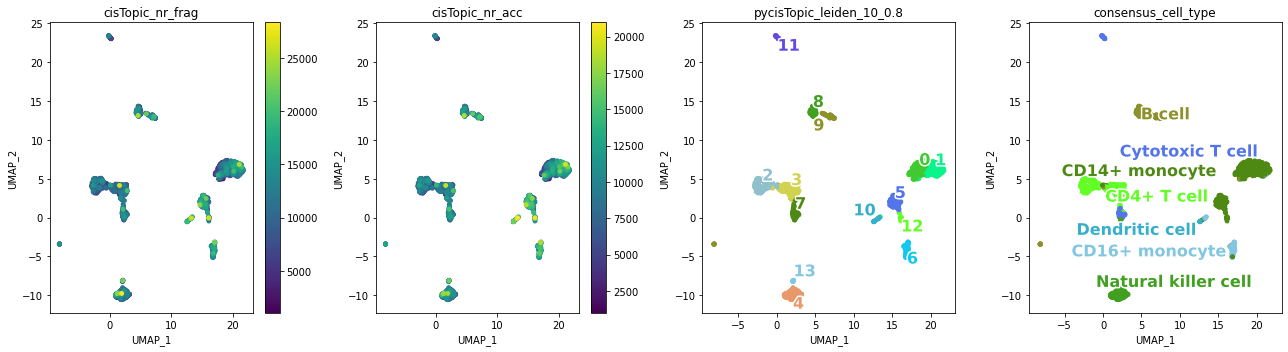

VIB_1


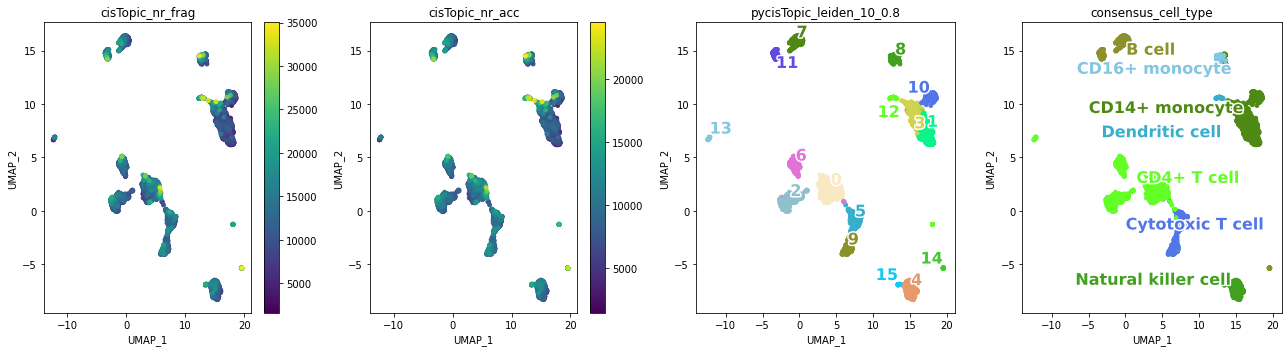

VIB_2


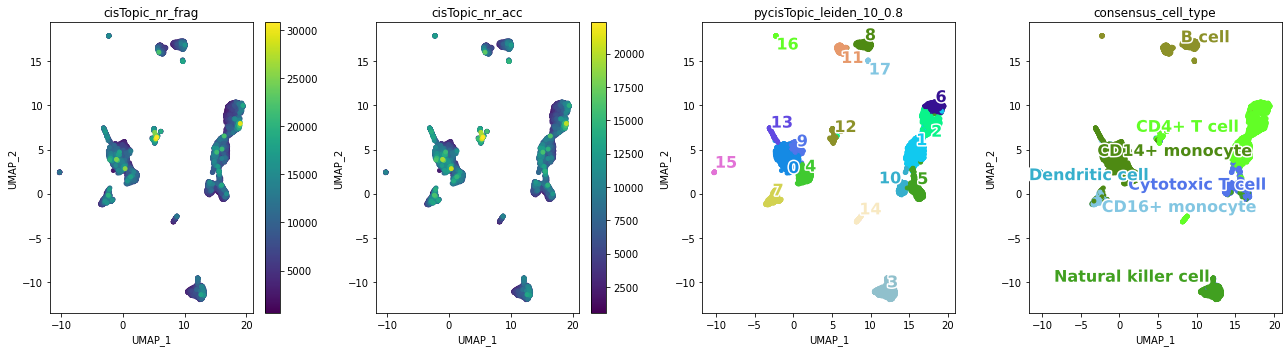

merged


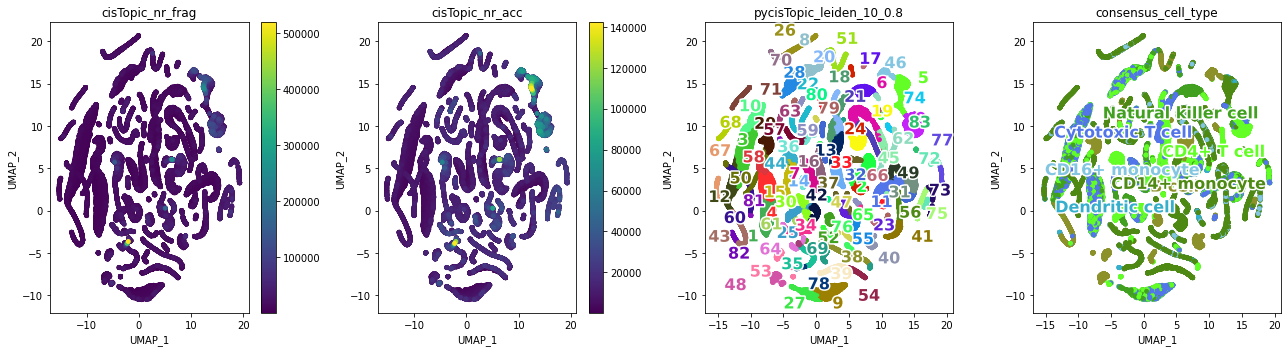

In [78]:
for key in cistopic_obj_dict.keys():
    print(key)
    plot_metadata(cistopic_obj_dict[key],
                  reduction_name='UMAP',
#                   variables=['Unique_nr_frag', 'TSS_enrichment', 'Dupl_rate', 'FRIP',
#                              'Doublet_scores_fragments', 'fmx_sample', 'pycisTopic_leiden_10_0.6', 'seurat_cell_type'],
                  variables=['cisTopic_nr_frag', 'cisTopic_nr_acc',
                             'pycisTopic_leiden_10_0.8', 'consensus_cell_type'],
                  target='cell',
                  num_columns=4,
                  text_size=16,
                  dot_size=15,
                  figsize=(18,5),
                 )

Broad_1


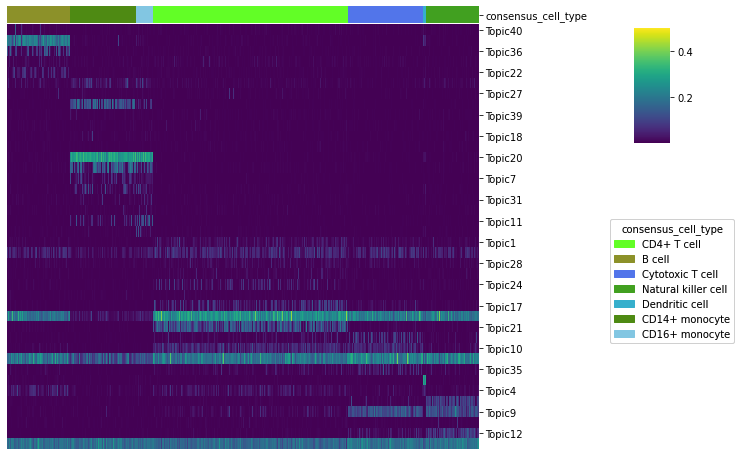

Broad_2


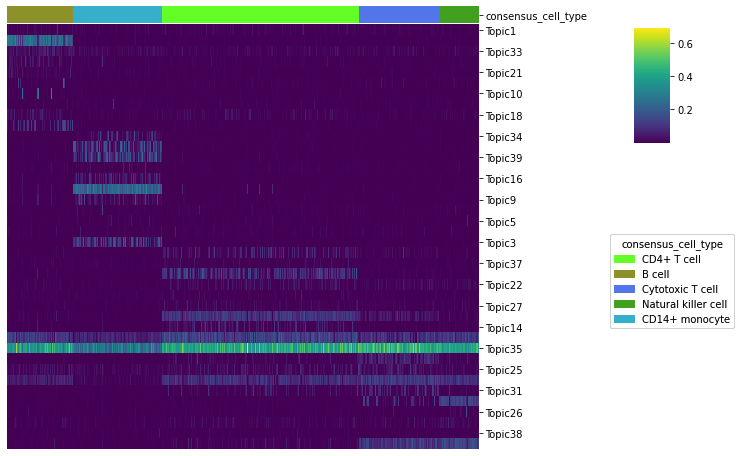

Broad_mito_1


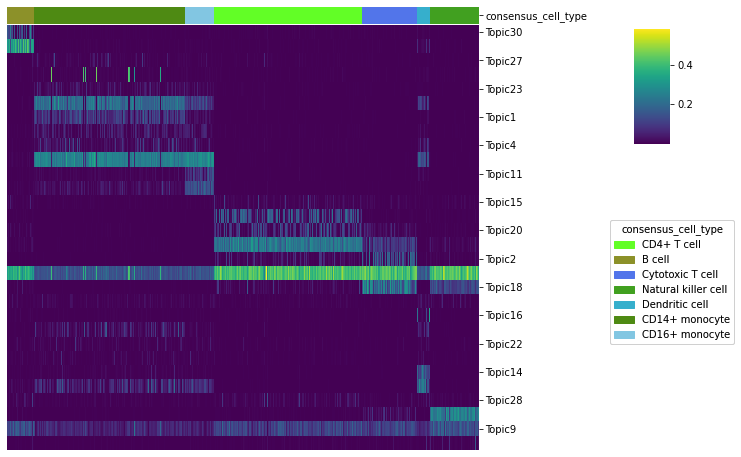

Broad_mito_2


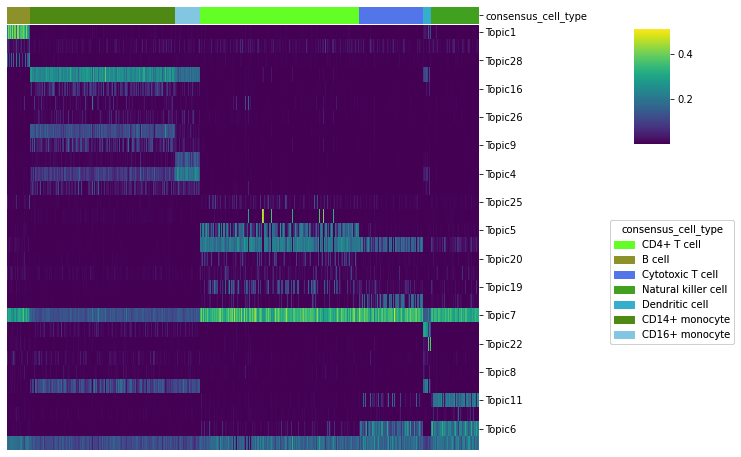

CNAG_1


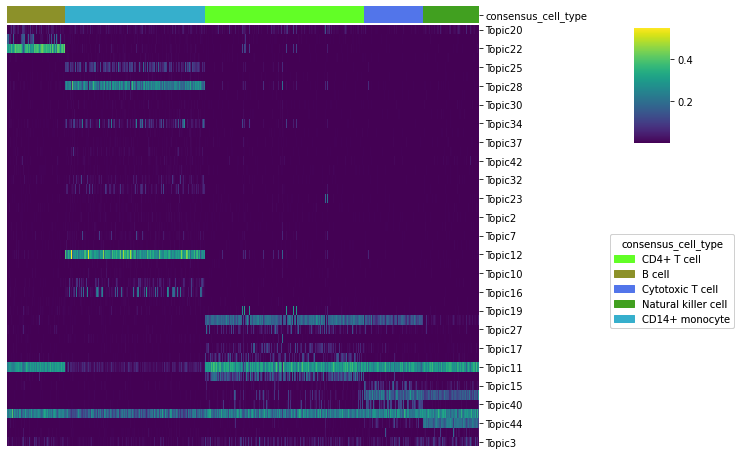

CNAG_2


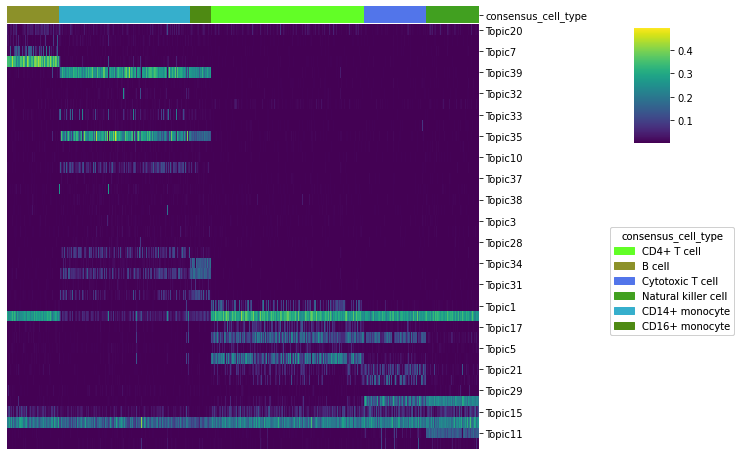

s3atac


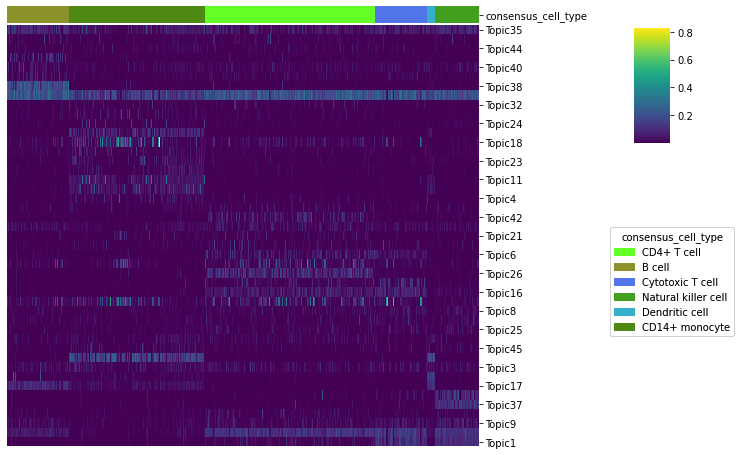

Sanger_1


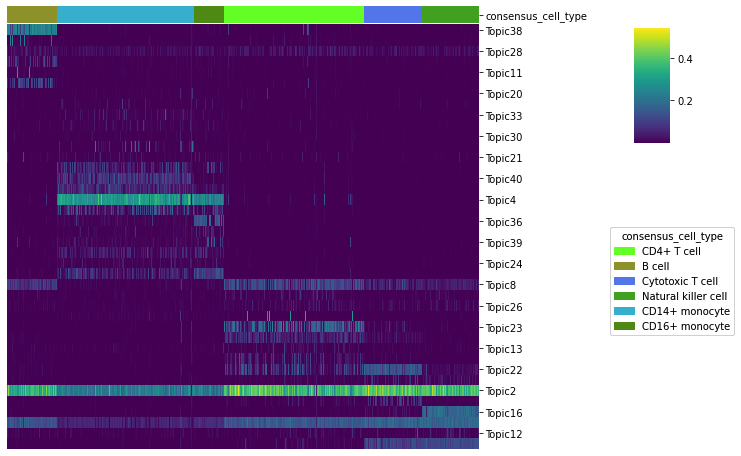

Sanger_2


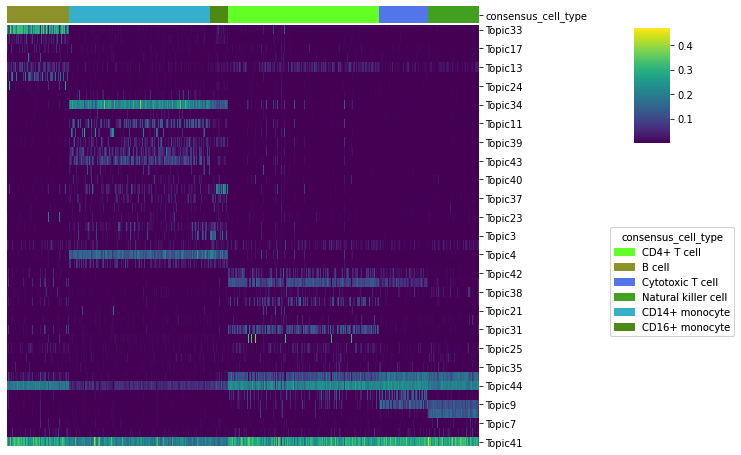

Stanford_1


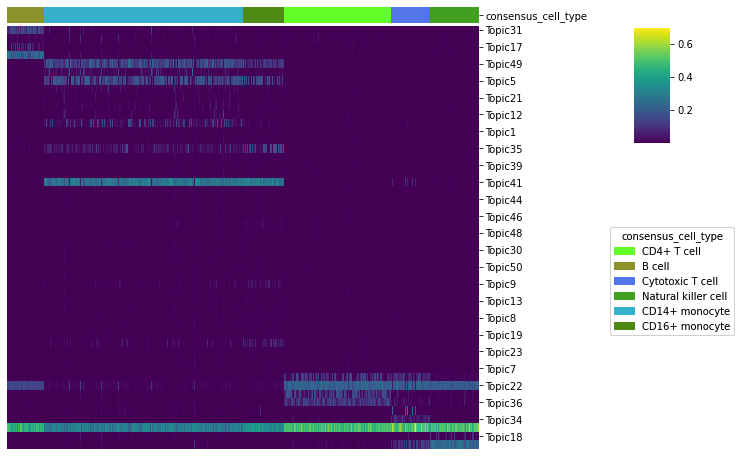

Stanford_2


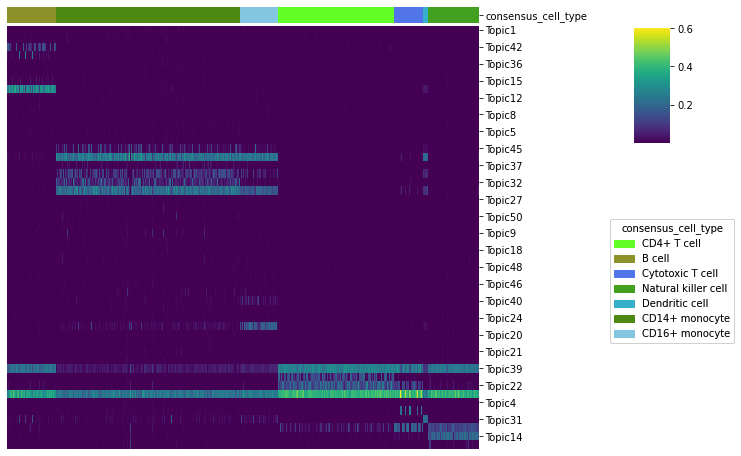

VIB_1


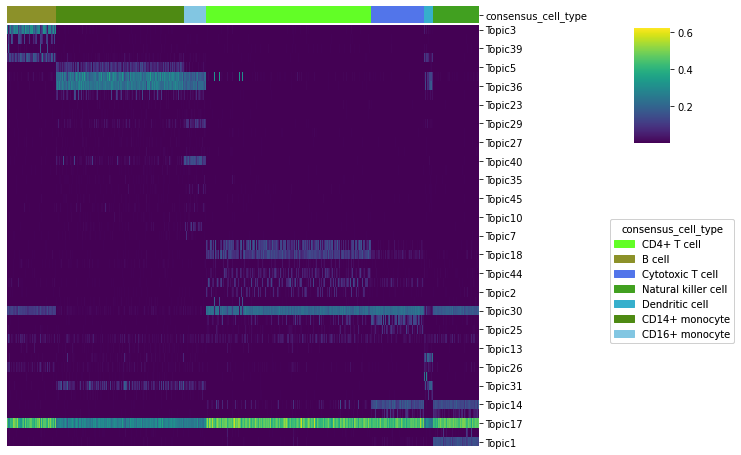

VIB_2


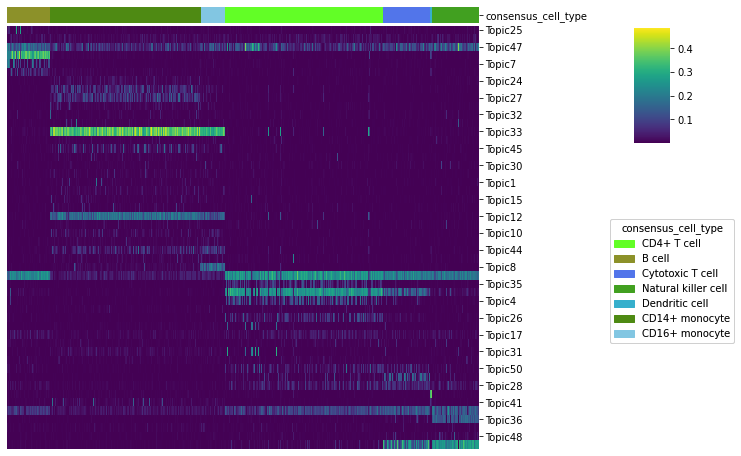

merged


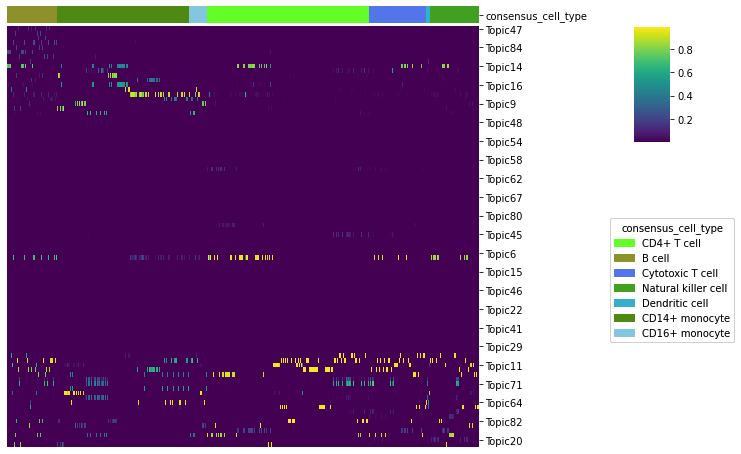

In [79]:
for key in cistopic_obj_dict.keys():
    print(key)
    cell_topic_heatmap(cistopic_obj_dict[key],
                     variables = ['consensus_cell_type'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,8),
                     )

## Batch effect correction with Harmony

In [80]:
from pycisTopic.clust_vis import harmony

In [81]:
harmony(cistopic_obj_dict['merged'],
        'sample_id',
        random_state=555,
        max_iter_harmony=20
       )

2021-09-14 15:48:55,089 numexpr.utils INFO     Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


2021-09-14 15:49:21,111 - harmonypy - INFO - Iteration 1 of 20


2021-09-14 15:49:21,111 harmonypy    INFO     Iteration 1 of 20


2021-09-14 15:51:34,402 - harmonypy - INFO - Iteration 2 of 20


2021-09-14 15:51:34,402 harmonypy    INFO     Iteration 2 of 20


2021-09-14 15:53:07,112 - harmonypy - INFO - Converged after 2 iterations


2021-09-14 15:53:07,112 harmonypy    INFO     Converged after 2 iterations


In [82]:
run_umap(cistopic_obj_dict['merged'], target = 'cell', reduction_name='UMAP_harmony', harmony=True)
#run_tsne(cistopic_obj_dict['merged'], target = 'cell', reduction_name='tSNE_harmony', harmony=True)

2021-09-14 15:55:22,314 cisTopic     INFO     Running UMAP


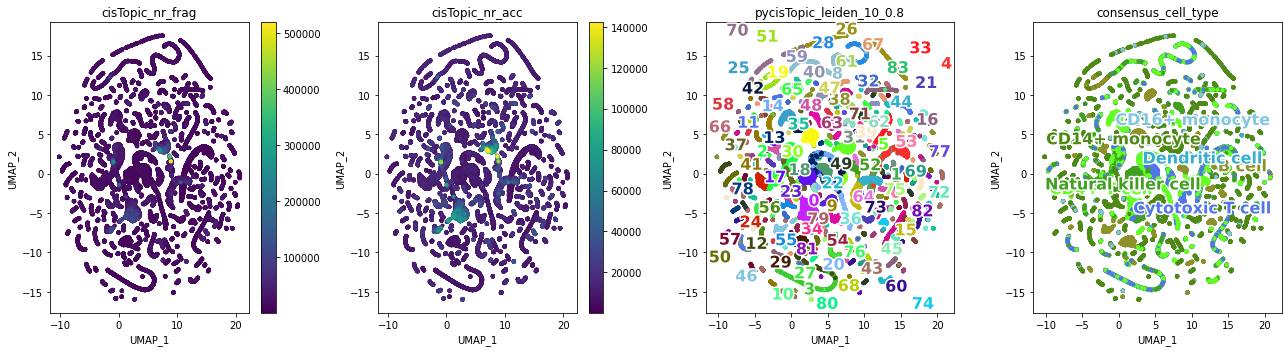

In [83]:
plot_metadata(cistopic_obj_dict['merged'],
              reduction_name='UMAP_harmony',
#               variables=['Unique_nr_frag', 'TSS_enrichment', 'Dupl_rate', 'FRIP',
#                              'Doublet_scores_fragments', 'fmx_sample', 'pycisTopic_leiden_10_0.6', 'seurat_cell_type', 'sample_id'],
              variables=['cisTopic_nr_frag', 'cisTopic_nr_acc',
                             'pycisTopic_leiden_10_0.8', 'consensus_cell_type'],
              target='cell',
              num_columns=4,
              text_size=16,
              dot_size=10,
              figsize=(18,5),
             )

UMAP without batch effect correction


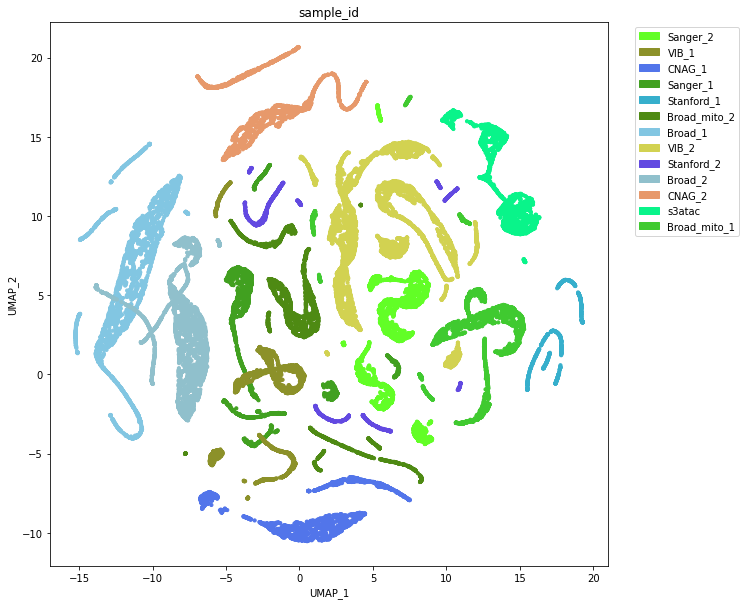

In [84]:
print("UMAP without batch effect correction")
plot_metadata(cistopic_obj_dict['merged'],
              reduction_name='UMAP',
              variables=['sample_id'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

UMAP with batch effect correction


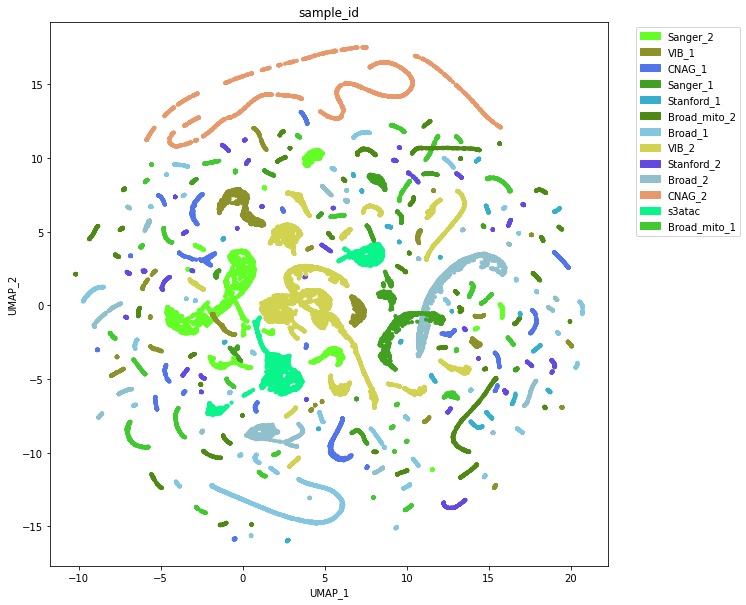

In [85]:
print("UMAP with batch effect correction")
plot_metadata(cistopic_obj_dict['merged'],
              reduction_name='UMAP_harmony',
              variables=['sample_id'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )